# Домашняя работа №2

In [1]:
import pandas as pd 

### Загрузка данных и первичный осмотр

In [2]:
df = pd.read_csv("S02-hw-dataset.csv") # подключение датасета
df.head(10)  # вывод первых 10 строк

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [3]:
df.info()  # вывод информации о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [4]:
df.describe()  # базовое описание датасета

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


### Пропуски, дубликаты и базовый контроль качества

In [5]:
print(df.isna().sum()) # количество пропусков
print("----------------")
print(df.isna().mean()) # доля пропусков

user_id      0
age          2
country      0
purchases    0
revenue      0
dtype: int64
----------------
user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64


In [6]:
df.duplicated().sum()   # количество дубликатов

1

In [7]:
df[(df["age"] > 100) | (df["age"] < 18)]  # несоответствие возрасту

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


In [8]:
df[(df["purchases"] < 0) | (df["revenue"] < 0)]  # отрицательные покупки или выручка

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [9]:
df[(df["revenue"] <= 0) & (df["purchases"] > 0)]  # нулевая выручка при ненулевых покупках

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [10]:
df[df.duplicated()] # пользователь дубликат

,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


##### В ходе проверки датасета были обнаружены проблемы с двумя пропусками в таблице age, также одним пользователем дубликатом.
##### Также были обнаружены пользователи у которых имеется явное несоответствие возраста действительному, также строки с отрицательными значениями покупок или выручки и нулевой выручкой при имении покупок.

###  Базовый EDA: группировки, агрегаты и частоты

In [11]:
print(df.country.value_counts())  # подсчет частот в категории страны
print("--------------------")
print(df.age.value_counts())  # подсчет частот в категории возраста

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64
--------------------
age
24.0     5
52.0     2
31.0     2
28.0     2
39.0     2
35.0     2
47.0     2
32.0     2
25.0     1
55.0     1
43.0     1
45.0     1
26.0     1
23.0     1
51.0     1
18.0     1
54.0     1
5.0      1
21.0     1
42.0     1
33.0     1
22.0     1
57.0     1
36.0     1
20.0     1
46.0     1
120.0    1
34.0     1
Name: count, dtype: int64


In [12]:
group1 = df.groupby("country")
print(group1["age"].mean())  # средний возраст людей по странам
print(group1["age"].sum())   # сумма возрастов людей по странам

country
CN    24.000000
DE    34.600000
FR    46.250000
RU    30.076923
US    36.714286
Name: age, dtype: float64
country
CN     48.0
DE    173.0
FR    555.0
RU    391.0
US    257.0
Name: age, dtype: float64


In [13]:
group2 = df.groupby("age")
group2["country"].value_counts()  # распределение возрастов по странам

age    country
5.0    RU         1
18.0   DE         1
20.0   CN         1
21.0   RU         1
22.0   FR         1
23.0   US         1
24.0   RU         4
       US         1
25.0   FR         1
26.0   RU         1
28.0   CN         1
       FR         1
31.0   RU         2
32.0   DE         1
       FR         1
33.0   FR         1
34.0   RU         1
35.0   DE         1
       US         1
36.0   DE         1
39.0   FR         1
       US         1
42.0   US         1
43.0   US         1
45.0   FR         1
46.0   RU         1
47.0   FR         1
       RU         1
51.0   US         1
52.0   DE         1
       FR         1
54.0   RU         1
55.0   FR         1
57.0   FR         1
120.0  FR         1
Name: count, dtype: int64

##### По увиденным данным можно сказать, что по странам доминирует Россия, а самая отстающая - Китай. Самый частый возраст - 24 года. Самый большой средний возраст граждан во Франции, а самый маленький в России.

## Визуализация данных в Matplotlib

In [14]:
import matplotlib.pyplot as plt

In [15]:
df_clean = df[(df["age"] >= 18) & (df["age"] <= 100) & (df["purchases"] > 0) & (df["revenue"] > 0)]

<function matplotlib.pyplot.show(close=None, block=None)>

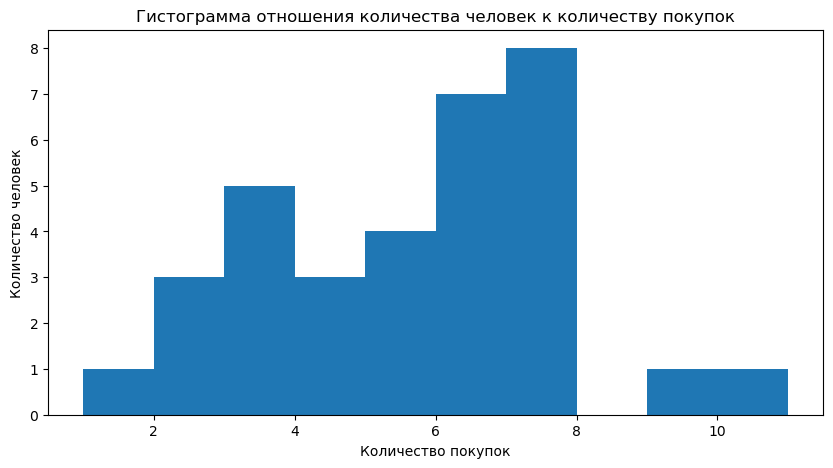

In [16]:
x = df_clean['purchases']
plt.figure(figsize=(10, 5))
plt.hist(x)
plt.xlabel('Количество покупок')
plt.ylabel('Количество человек')
plt.title("Гистограмма отношения количества человек к количеству покупок")
plt.savefig("figures/hist_diag.png")
plt.show

##### Вывод по диаграмме: 8 покупок совершило около 8 человек. 9 покупок не совершил ни один человек. 10 и 11 покупок совершило всего по одному человеку.

In [17]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

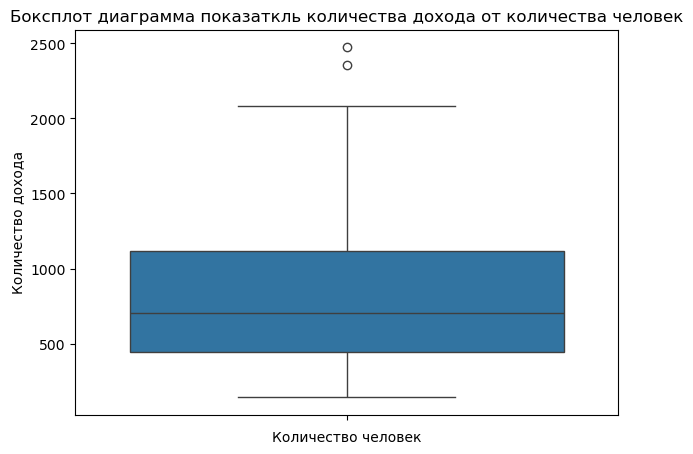

In [18]:
x = df_clean['revenue']
plt.figure(figsize=(7, 5))
sns.boxplot(y = x)
plt.xlabel('Количество человек')
plt.ylabel('Количество дохода')
plt.title("Боксплот диаграмма показаткль количества дохода от количества человек")

plt.show

##### Вывод по диаграмме: ящик довольно плоский, значит большинство доходов сосредоточено в узком диапазоне. Ящик больше смещён к низу, значит больше людей с низким доходом, однако верхний ус довольно длиный, а также есть выбросы, значит есть люди с очень высоким доходом.

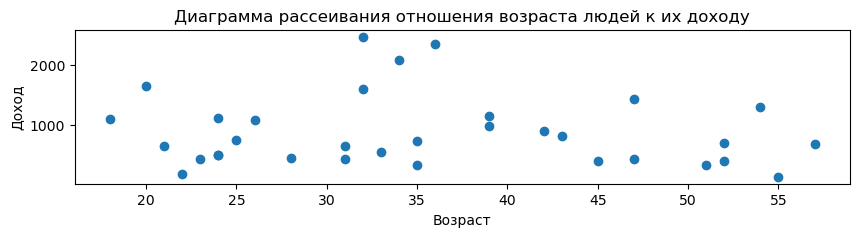

In [ ]:
plt.figure(figsize = (10, 2))
plt.scatter(df_clean['age'], df_clean["revenue"])
plt.xlabel("Возраст")
plt.ylabel("Доход")
plt.title("Диаграмма рассеивания отношения возраста людей к их доходу")
plt.savefig("figures/scatter_diag.png")
plt.show()

##### Диаграмма показывает отношение возраста людей к их доходу. Видно, что у людей среднего возраста доход наивысший. А у людей чуть меньше и больше 35 лет наибольшие просадки в доходах.